### Voronyi-Stepan-Camp-2025
### Ridge

Ridge Regression: R2 = 0.4541, MSE = 2892.01


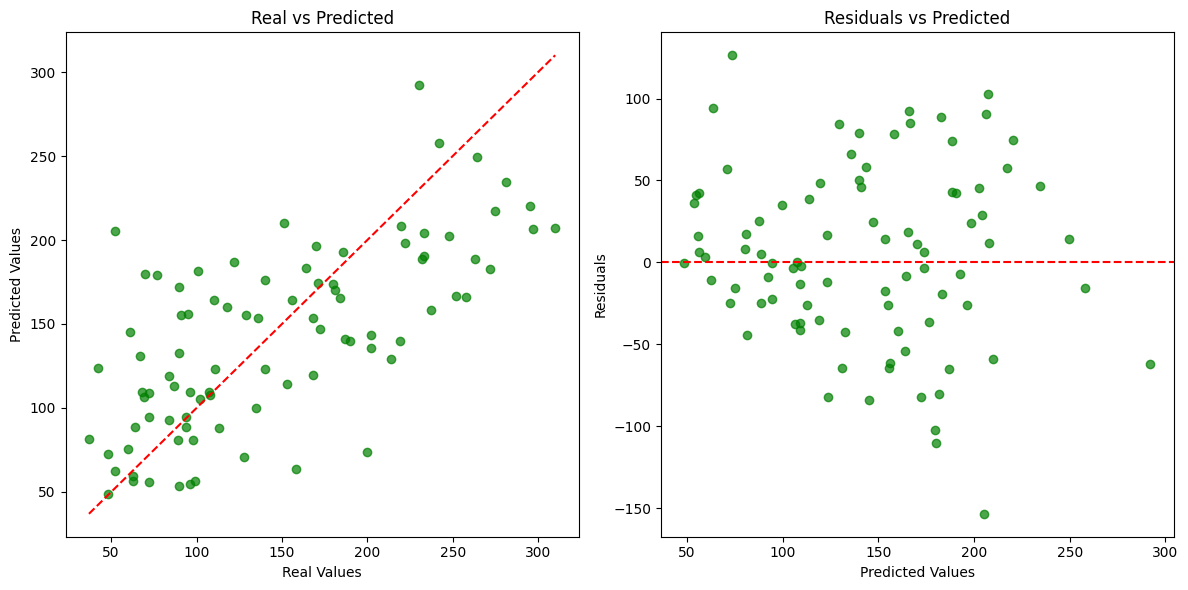

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name}: R2 = {r2:.4f}, MSE = {mse:.2f}")

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred = ridge_reg.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Ridge Regression")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted")

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.tight_layout()
plt.show()


### Lasso

Lasso Regression: R2 = 0.4529, MSE = 2898.37


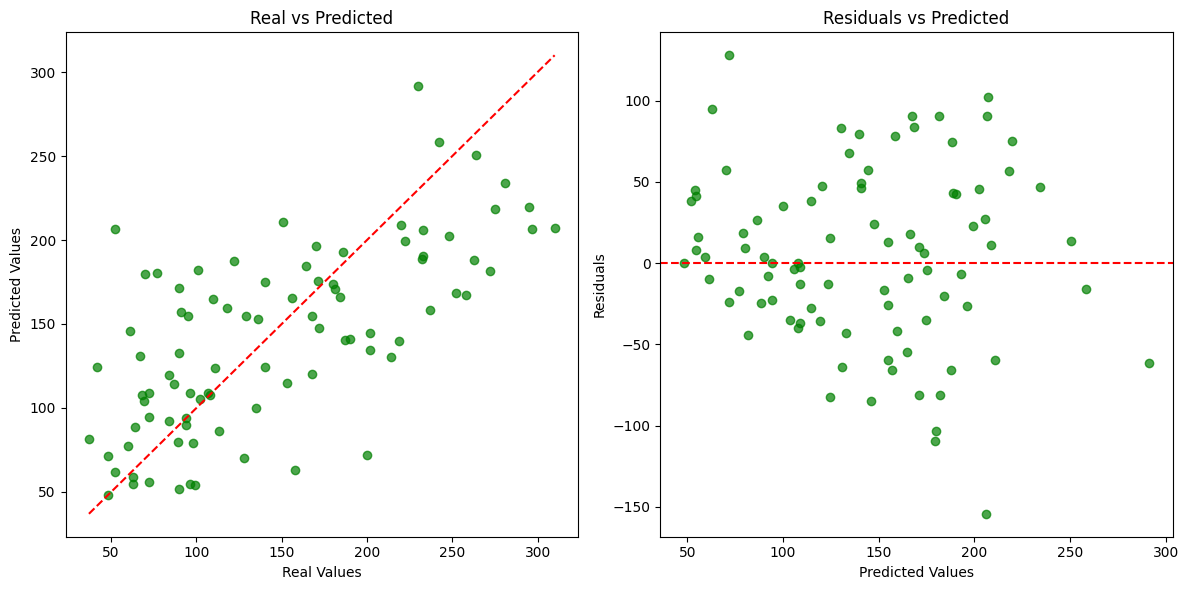

In [26]:
lasso_reg = Lasso(alpha=0.01, max_iter=10000)
lasso_reg.fit(X_train_scaled, y_train)
y_pred = lasso_reg.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Lasso Regression")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted")

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.tight_layout()
plt.show()


### Polynomial

Polynomial Regression: R2 = 0.4156, MSE = 3096.03


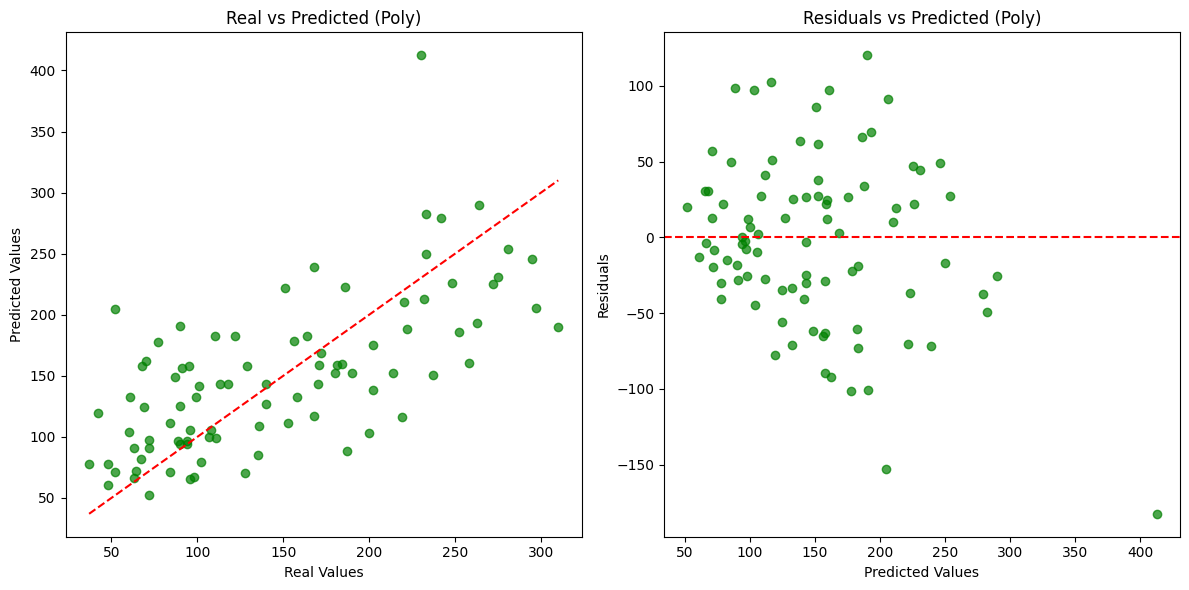

In [27]:
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_model.fit(X_train_scaled, y_train)
y_poly_pred = poly_model.predict(X_test_scaled)

evaluate_model(y_test, y_poly_pred, "Polynomial Regression")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_poly_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted (Poly)")

plt.subplot(1, 2, 2)
poly_residuals = y_test - y_poly_pred
plt.scatter(y_poly_pred, poly_residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Poly)")

plt.tight_layout()
plt.show()


### Polynomial + Ridge

Polynomial + Ridge Regression: R2 = 0.4526, MSE = 2900.37


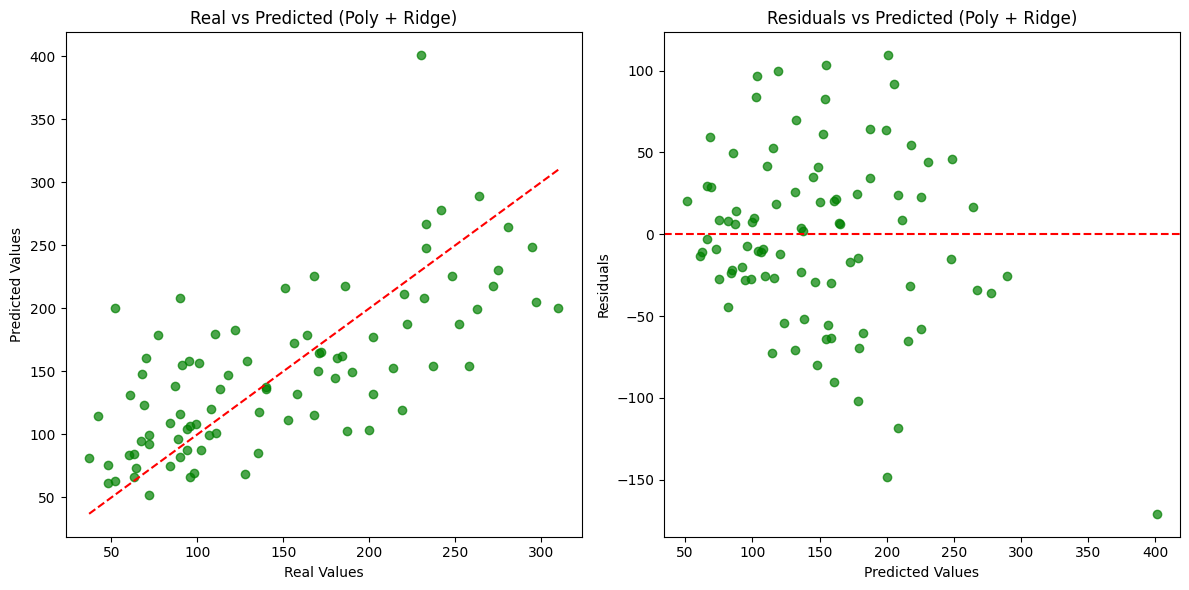

In [28]:
poly_ridge_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge_reg', Ridge(alpha=1.0))
])

poly_ridge_model.fit(X_train_scaled, y_train)
y_poly_ridge_pred = poly_ridge_model.predict(X_test_scaled)
evaluate_model(y_test, y_poly_ridge_pred, "Polynomial + Ridge Regression")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_poly_ridge_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted (Poly + Ridge)")

plt.subplot(1, 2, 2)
residuals = y_test - y_poly_ridge_pred
plt.scatter(y_poly_ridge_pred, residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Poly + Ridge)")

plt.tight_layout()
plt.show()


### Polynomial + Linear

Polynomial + Linear Regression: R2 = 0.4156, MSE = 3096.03


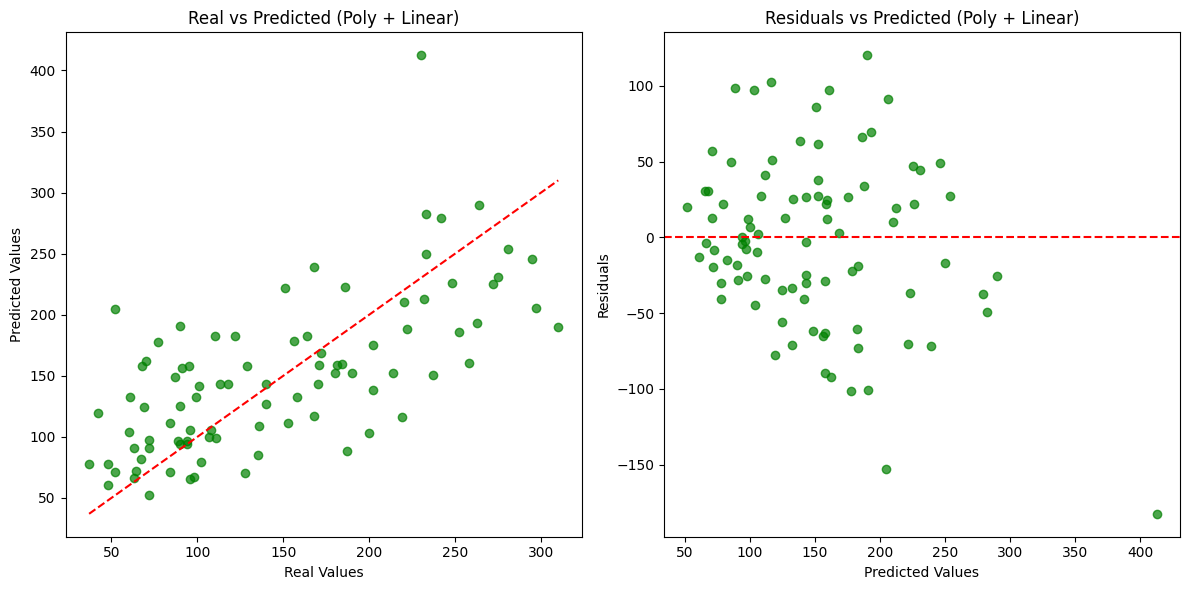

In [29]:
poly_linear_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_reg', LinearRegression())
])

poly_linear_model.fit(X_train_scaled, y_train)
y_poly_linear_pred = poly_linear_model.predict(X_test_scaled)
evaluate_model(y_test, y_poly_linear_pred, "Polynomial + Linear Regression")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_poly_linear_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted (Poly + Linear)")

plt.subplot(1, 2, 2)
residuals = y_test - y_poly_linear_pred
plt.scatter(y_poly_linear_pred, residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Poly + Linear)")

plt.tight_layout()
plt.show()


### Polynomial + Lasso

Polynomial + Lasso Regression: R2 = 0.4754, MSE = 2779.66


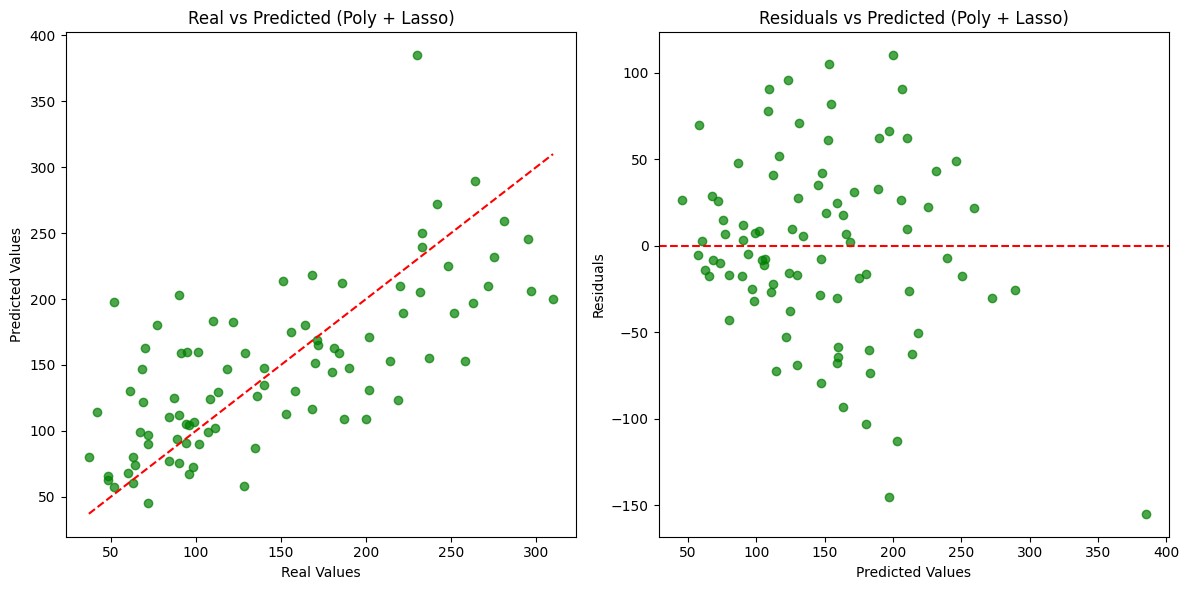

In [30]:
poly_lasso_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso_reg', Lasso(alpha=0.1, max_iter=10000))
])

poly_lasso_model.fit(X_train_scaled, y_train)
y_poly_lasso_pred = poly_lasso_model.predict(X_test_scaled)

evaluate_model(y_test, y_poly_lasso_pred, "Polynomial + Lasso Regression")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_poly_lasso_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted (Poly + Lasso)")

plt.subplot(1, 2, 2)
poly_lasso_residuals = y_test - y_poly_lasso_pred
plt.scatter(y_poly_lasso_pred, poly_lasso_residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Poly + Lasso)")

plt.tight_layout()
plt.show()
